<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Diversi%C3%B3n/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/#:~:text=La%20regresi%C3%B3n%20lineal%20es%20un,discretos%2C%20utilizar%C3%ADamos%20Regresi%C3%B3n%20Log%C3%ADstica).
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [ ]:
#Data = pd.read_csv('/Datos Historicos.csv', sep=";")
Data = pd.read_excel('morita.xlsx')
Data=Data.iloc[100:-1]
Data

,day,demanda
100,101,4389.1
101,102,4400.2
102,103,4394.3
103,104,4396.4
104,105,4394.5
...,...,...
1321,1322,4518.2
1322,1323,4522.3
1323,1324,4516.4
1324,1325,4513.5


In [ ]:
X_train=Data[['day']]
y_train=Data[['demanda']]
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score (R^2): %.2f' % r2_score(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Mean absolute error (MAE):' , mean_absolute_error(y_train, y_pred))
print('Mean absolute percentage error (MAPE):' , mean_absolute_percentage_error(y_train, y_pred),'%')

Coefficients: 
 [[0.10013538]]
Independent term: 
 [4383.06572292]
Mean squared error: 34.98
Variance score (R^2): 0.97
Mean absolute error (MAE): 5.069286629038086
Mean absolute percentage error (MAPE): 0.11382246179514802 %


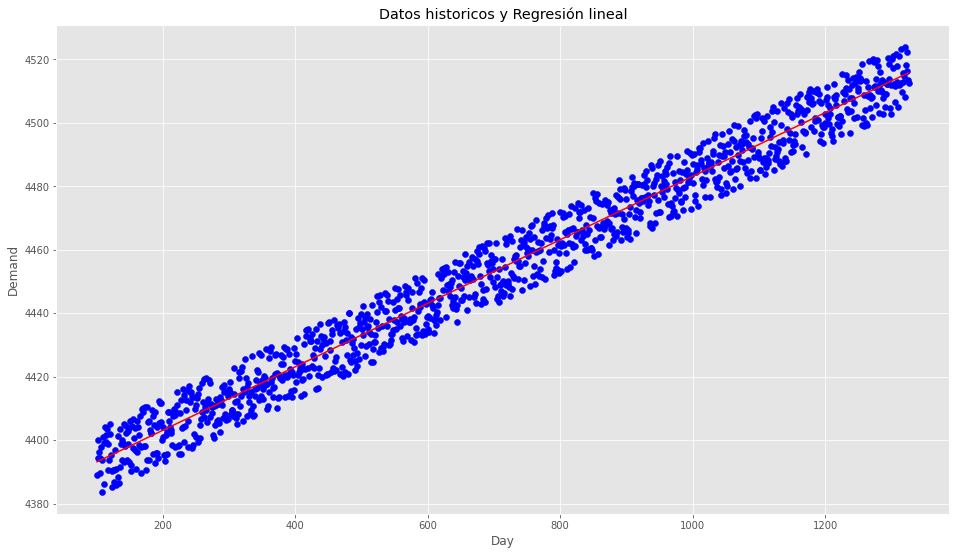

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,y_pred,color='red')
plt.title('Datos historicos y Regresión lineal')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.style.use('ggplot')
plt.show()

In [ ]:
Cantidad=10
Ultimo=Data['day'].iloc[-1]
Pronosticos = pd.DataFrame()
Pronosticos['Day'] = range(Ultimo+1,Ultimo+Cantidad+1)
Pronosticos['Demand']=np.int64(np.round(regr.predict(Pronosticos[['Day']])))
Pronosticos

,Day,Demand
0,1327,4516
1,1328,4516
2,1329,4516
3,1330,4516
4,1331,4516
5,1332,4516
6,1333,4517
7,1334,4517
8,1335,4517
9,1336,4517


In [ ]:
Cantidad=10
Ultimo=Data['day'].iloc[-1]
Pronosticos = pd.DataFrame()
Pronosticos['Day'] = range(Ultimo+1,Ultimo+Cantidad+1)
Pronosticos['Demand']=regr.predict(Pronosticos[['Day']])
Pronosticos

,Day,Demand
0,1327,4515.945372
1,1328,4516.045507
2,1329,4516.145643
3,1330,4516.245778
4,1331,4516.345914
5,1332,4516.446049
6,1333,4516.546184
7,1334,4516.646320
8,1335,4516.746455
9,1336,4516.846590


In [ ]:
Pronosticos.to_excel('Johnny.xlsx')

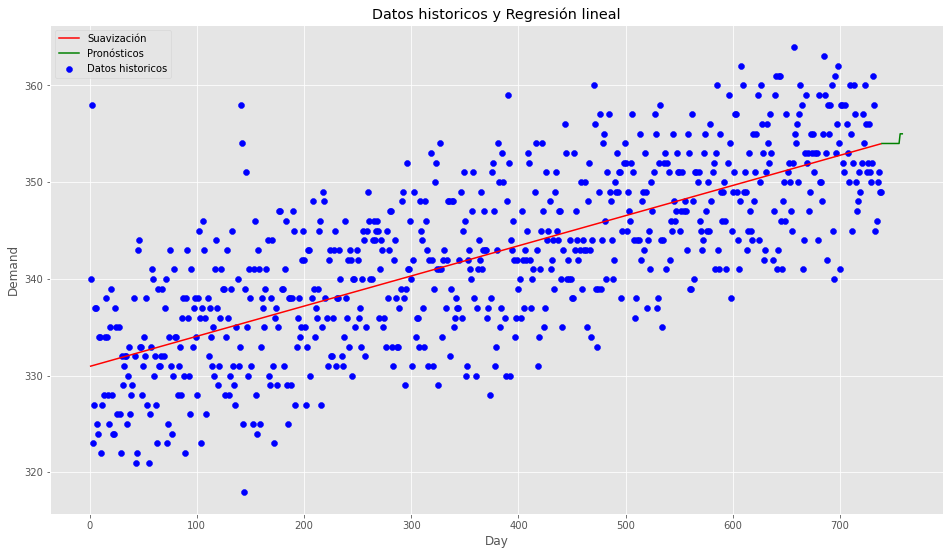

In [ ]:
plt.scatter(X_train,y_train,color='blue',label='Datos historicos')
plt.plot(X_train,y_pred,color='red',label='Suavización')
plt.plot(Pronosticos['Day'],Pronosticos['Demand'],color='green',label='Pronósticos')
plt.legend()
plt.title('Datos historicos y Regresión lineal')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.show()